<a href="https://colab.research.google.com/github/shantanu812/MLProjects/blob/main/WIneDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training SVM Classifier on Wine Dataset

In [6]:
from sklearn.datasets import load_wine
wine=load_wine(as_frame=True)
print(wine.data.shape)


(178, 13)


In [7]:
#Statistics
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [8]:
#splitting of training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.2,random_state=42)


In [9]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


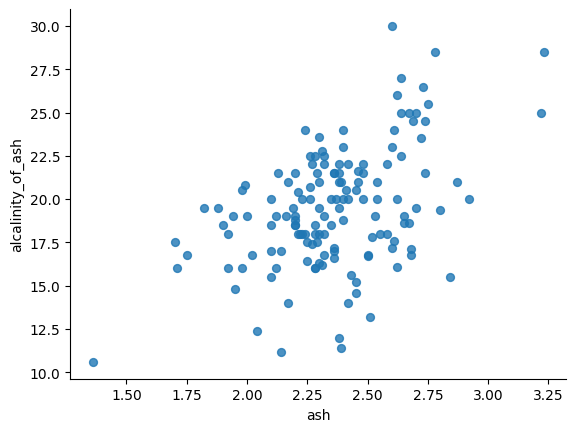

In [31]:
#Data Visualization
from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='ash', y='alcalinity_of_ash', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

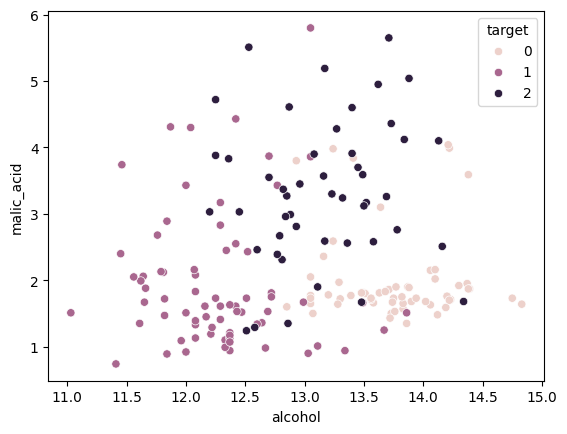

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=wine.data, x='alcohol', y='malic_acid', hue=wine.target)
plt.show()

In [16]:
#Linear SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
lin_clf=make_pipeline(StandardScaler(),LinearSVC(dual=True,random_state=42,loss='hinge',C=20))
lin_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=20, dual=True, loss='hinge', random_state=42))])

In [17]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(lin_clf,X_train,y_train,cv=3).mean()


np.float64(0.9719267139479907)

In [18]:
#kernelized SVC
from sklearn.svm import SVC
kernel_clf=make_pipeline(StandardScaler(),SVC(random_state=42))
cross_val_score(kernel_clf,X_train,y_train).mean()

np.float64(0.97192118226601)

In [19]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(kernel_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=np.float64(2.560186404424365),
                     gamma=np.float64(0.002051110418843397),
                     random_state=42))])

In [20]:
rnd_search_cv.best_score_

np.float64(0.9857142857142858)

In [23]:
#making predictions
y_pred=rnd_search_cv.predict(X_test)
rnd_search_cv.score(X_test,y_test)


1.0

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # 'weighted' for multiclass

In [25]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [26]:
import numpy as np

new_sample = np.array([[13.5, 2.2, 2.0, 19.0, 92.0, 12.0, 40.0, 0.995, 3.3, 0.6, 5.0, 1000.0, 2.0]])

prediction = rnd_search_cv.predict(new_sample)

print(f"Prediction for the new sample: {prediction}")

Prediction for the new sample: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
